The program was created using Python version 3.9.7. The needed packages to run this program will be install when this notebook is ran.

In [ ]:
%pip install matplotlib
%pip install pandas

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The data file "exoplanet.Archive.csv" was created from a data file downloaded from the NASA Exoplanet Archive @  http://exoplanetarchive.ipac.caltech.edu. The "exoplanet.Archive.csv" only includes the csv data and excludes the notes and data 
column header definition index. The size of the data is 3815 rows (exoplanets) and 19 columns (exoplanets characteristics).

In [44]:
planetArch = pd.read_csv("exoplanetArchive.csv")
print(planetArch.shape)

(3815, 19)


Preview of the exoplanet list. 
Index of column header definitions:

Refer to Readme.md

In [45]:
planetArch.head(5)

,pl_name,hostname,sy_snum,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,sy_dist,sy_disterr1,sy_disterr2
0,51 Eri b,51 Eri,3,1,11688.000000,6209.250000,-3287.250000,0,13.400,NaN,NaN,0,700,NaN,NaN,0,29.7575,0.121300,-0.120300
1,55 Cnc b,55 Cnc,2,5,14.651600,0.000100,-0.000100,0,13.900,NaN,NaN,0,700,NaN,NaN,0,12.5855,0.012400,-0.012300
2,55 Cnc e,55 Cnc,2,5,0.736547,0.000001,-0.000001,0,1.875,0.029,-0.029,0,1958,15.0,-15.0,0,12.5855,0.012400,-0.012300
3,AU Mic b,AU Mic,1,2,8.462999,NaN,NaN,0,4.070,0.170,-0.170,0,593,21.0,-21.0,0,9.7221,0.004625,-0.004625
4,AU Mic c,AU Mic,1,2,18.858991,NaN,NaN,0,3.240,0.160,-0.160,0,454,16.0,-16.0,0,9.7221,0.004625,-0.004625


The unused column data removed to condense the list information size.

In [46]:
planetArch2 = planetArch.drop(columns = ["pl_orbper","pl_orbpererr1", "pl_orbpererr2","pl_orbpererr2","pl_orbperlim","pl_radeerr1","pl_radeerr2","pl_radelim","pl_eqt","pl_eqterr1","pl_eqterr2","pl_eqtlim","sy_disterr1","sy_disterr2"])
planetArch2.head()

,pl_name,hostname,sy_snum,sy_pnum,pl_rade,sy_dist
0,51 Eri b,51 Eri,3,1,13.400,29.7575
1,55 Cnc b,55 Cnc,2,5,13.900,12.5855
2,55 Cnc e,55 Cnc,2,5,1.875,12.5855
3,AU Mic b,AU Mic,1,2,4.070,9.7221
4,AU Mic c,AU Mic,1,2,3.240,9.7221


This is the list of current columns left in the data frame.

In [47]:
planetArch2.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'pl_rade', 'sy_dist'], dtype='object')

The current column labels are renamed for clarity.

In [48]:
fixed_columns = {'pl_name' : 'Planet Name', 'hostname' : 'Host Star', 'sy_snum' : 'Number of Stars', 'sy_pnum' : 'Number of Planets',
                 'pl_rade' : 'Radius (x Earth Radius)', 'sy_dist' : 'Distance from Earth (pc)'}

All the exoplanet columns are renamed for better clarity of what the column values represent.

In [49]:
planetArch2.rename(columns=fixed_columns, inplace=True)
planetArch2

,Planet Name,Host Star,Number of Stars,Number of Planets,Radius (x Earth Radius),Distance from Earth (pc)
0,51 Eri b,51 Eri,3,1,13.400,29.75750
1,55 Cnc b,55 Cnc,2,5,13.900,12.58550
2,55 Cnc e,55 Cnc,2,5,1.875,12.58550
3,AU Mic b,AU Mic,1,2,4.070,9.72210
4,AU Mic c,AU Mic,1,2,3.240,9.72210
...,...,...,...,...,...,...
3810,YZ Cet c,YZ Cet,1,3,1.050,3.71207
3811,YZ Cet d,YZ Cet,1,3,1.030,3.71207
3812,bet Pic b,bet Pic,1,2,18.495,19.74420
3813,rho CrB b,rho CrB,1,2,13.800,17.46710


Seaborn plot of all exoplanets distance from earth in parsec (1pc = 3.262 lightyears) on the x axis. Radius of the exoplanet times the earth radius, number of other planets in the exoplanets system (hue), and the number of stars in the exoplanets system (size).

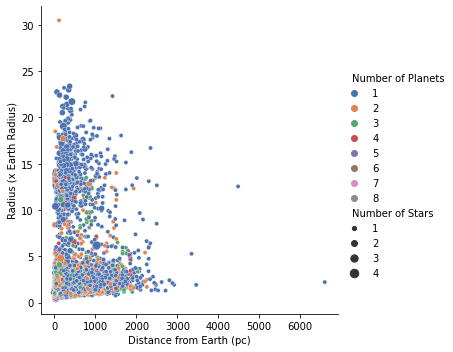

In [50]:
sns.relplot(data = planetArch2, x="Distance from Earth (pc)", y="Radius (x Earth Radius)", hue="Number of Planets", size="Number of Stars", palette="deep")

The remaining data columns for analysis will be the Planet ('Planet Name'), system star ('Host Star'), number of stars in the planetary system ('Number of Stars'), and the number of planets in the system ('Number of Planets'). This data will be merged with the Earth's solar system data.

In [51]:
planetArch3 = planetArch2.drop(columns = ["Radius (x Earth Radius)","Distance from Earth (pc)"])
planetArch3

,Planet Name,Host Star,Number of Stars,Number of Planets
0,51 Eri b,51 Eri,3,1
1,55 Cnc b,55 Cnc,2,5
2,55 Cnc e,55 Cnc,2,5
3,AU Mic b,AU Mic,1,2
4,AU Mic c,AU Mic,1,2
...,...,...,...,...
3810,YZ Cet c,YZ Cet,1,3
3811,YZ Cet d,YZ Cet,1,3
3812,bet Pic b,bet Pic,1,2
3813,rho CrB b,rho CrB,1,2


This is the Earth's solar system data, obtain from Kaggle.com: https://www.kaggle.com/datasets/iamsouravbanerjee/planet-dataset
The cvs dataset is read in as 8 rows for the 8 planets in our solar system and 22 columns with characteristics of each planet. The characteristic column headers are clear in what the characteristic means.

In [52]:
ourSystem = pd.read_csv("planets.csv") 
ourSystem.shape
ourSystem

,Planet,Color,Mass (10^24kg),Diameter (km),Density (kg/m^3),Surface Gravity(m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,Grey,0.330,4879,5429,3.7,4.3,1407.6,4222.6,57.9,...,88,47.4,7.0,0.206,0.034,167,0,0,No,Yes
1,Venus,Brown and Grey,4.870,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,...,224.7,35.0,3.4,0.007,177.400,464,92,0,No,No
2,Earth,"Blue, Brown Green and White",5.970,12756,5514,9.8,11.2,23.9,24.0,149.6,...,365.2,29.8,0.0,0.017,23.400,15,1,1,No,Yes
3,Mars,"Red, Brown and Tan",0.642,6792,3934,3.7,5.0,24.6,24.7,228.0,...,687,24.1,1.8,0.094,25.200,-65,0.01,2,No,No
4,Jupiter,"Brown, Orange and Tan, with White cloud stripes",1898.000,142984,1326,23.1,59.5,9.9,9.9,778.5,...,4331,13.1,1.3,0.049,3.100,-110,Unknown,79,Yes,Yes
5,Saturn,"Golden, Brown, and Blue-Grey",568.000,120536,687,9.0,35.5,10.7,10.7,1432.0,...,"10,747",9.7,2.5,0.052,26.700,-140,Unknown,82,Yes,Yes
6,Uranus,Blue-Green,86.800,51118,1270,8.7,21.3,-17.2,17.2,2867.0,...,"30,589",6.8,0.8,0.047,97.800,-195,Unknown,27,Yes,Yes
7,Neptune,Blue,102.000,49528,1638,11.0,23.5,16.1,16.1,4515.0,...,"59,800",5.4,1.8,0.010,28.300,-200,Unknown,14,Yes,Yes


This is a Solar System planets, including Earth, plot based on the distance from the Sun (x-axis), Mean temperature (y-axis), Diameter (km) as the hue, and the planet Mass (10^24kg) as the size.

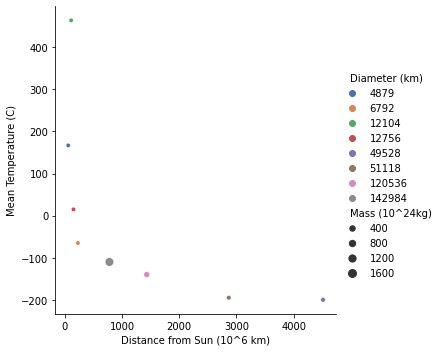

In [53]:
sns.relplot(data = ourSystem, x="Distance from Sun (10^6 km)", y="Mean Temperature (C)", hue="Diameter (km)", size="Mass (10^24kg)", palette="deep")

The solar system data is condensed down to only the "Planet",	"Diameter (km)", "Distance from Sun (10^6 km)", "Orbital Period (days)", and "Mean Temperature (C)" columns.

In [54]:
ourSystem2 = ourSystem.drop(columns = ["Color","Mass (10^24kg)","Density (kg/m^3)","Surface Gravity(m/s^2)","Escape Velocity (km/s)",
                         "Rotation Period (hours)","Length of Day (hours)","Orbital Velocity (km/s)","Orbital Inclination (degrees)",
                         "Orbital Eccentricity","Obliquity to Orbit (degrees)","Surface Pressure (bars)","Number of Moons","Ring System?",
                         "Perihelion (10^6 km)","Aphelion (10^6 km)","Global Magnetic Field?"])
ourSystem2

,Planet,Diameter (km),Distance from Sun (10^6 km),Orbital Period (days),Mean Temperature (C)
0,Mercury,4879,57.9,88,167
1,Venus,12104,108.2,224.7,464
2,Earth,12756,149.6,365.2,15
3,Mars,6792,228.0,687,-65
4,Jupiter,142984,778.5,4331,-110
5,Saturn,120536,1432.0,"10,747",-140
6,Uranus,51118,2867.0,"30,589",-195
7,Neptune,49528,4515.0,"59,800",-200


The "Planet" column is renamed to "Planet Name".

In [55]:
fixed_columns2 = {'Planet' : 'Planet Name'}
ourSystem2.rename(columns=fixed_columns2, inplace=True)
ourSystem2

,Planet Name,Diameter (km),Distance from Sun (10^6 km),Orbital Period (days),Mean Temperature (C)
0,Mercury,4879,57.9,88,167
1,Venus,12104,108.2,224.7,464
2,Earth,12756,149.6,365.2,15
3,Mars,6792,228.0,687,-65
4,Jupiter,142984,778.5,4331,-110
5,Saturn,120536,1432.0,"10,747",-140
6,Uranus,51118,2867.0,"30,589",-195
7,Neptune,49528,4515.0,"59,800",-200


In order to merge to solar system data (ourSystem2) and the exoplanet data (planetArch3), we are going to make each data set
have the same column heading parameters of "Planet", "Host Star", "Number of Stars", and "Number of Planets". Two new columns are created for the planets.csv data to with sun and total planet data.

In [56]:
ourSystem2['Host Star'] = 'Sun'
ourSystem2['Number of Stars'] = 1
ourSystem2['Number of Planets'] = 8

ourSystem2

,Planet Name,Diameter (km),Distance from Sun (10^6 km),Orbital Period (days),Mean Temperature (C),Host Star,Number of Stars,Number of Planets
0,Mercury,4879,57.9,88,167,Sun,1,8
1,Venus,12104,108.2,224.7,464,Sun,1,8
2,Earth,12756,149.6,365.2,15,Sun,1,8
3,Mars,6792,228.0,687,-65,Sun,1,8
4,Jupiter,142984,778.5,4331,-110,Sun,1,8
5,Saturn,120536,1432.0,"10,747",-140,Sun,1,8
6,Uranus,51118,2867.0,"30,589",-195,Sun,1,8
7,Neptune,49528,4515.0,"59,800",-200,Sun,1,8


The remaining unneeded columns ("Diameter (km)","Distance from Sun (10^6 km)","Orbital Period (days)","Mean Temperature (C)") are removed from the solar system data set (ourSystem2).

In [57]:
ourSystem3 = ourSystem2.drop(columns = ["Diameter (km)","Distance from Sun (10^6 km)","Orbital Period (days)","Mean Temperature (C)"])
ourSystem3

,Planet Name,Host Star,Number of Stars,Number of Planets
0,Mercury,Sun,1,8
1,Venus,Sun,1,8
2,Earth,Sun,1,8
3,Mars,Sun,1,8
4,Jupiter,Sun,1,8
5,Saturn,Sun,1,8
6,Uranus,Sun,1,8
7,Neptune,Sun,1,8


The solar system data (ourSystem3) and the exoplanet data (planetArch3) are combined into one data set with the same columns:
"Planet Name",	"Host Star", "Number of Stars",	and "Number of Planets".


In [58]:
newPlanetList = pd.concat([planetArch3, ourSystem3], sort=False)
newPlanetList

,Planet Name,Host Star,Number of Stars,Number of Planets
0,51 Eri b,51 Eri,3,1
1,55 Cnc b,55 Cnc,2,5
2,55 Cnc e,55 Cnc,2,5
3,AU Mic b,AU Mic,1,2
4,AU Mic c,AU Mic,1,2
...,...,...,...,...
3,Mars,Sun,1,8
4,Jupiter,Sun,1,8
5,Saturn,Sun,1,8
6,Uranus,Sun,1,8


A seaborn plot of all planets and exoplanets with the number of planets in the planet's system on the x axis, the number of stars in the planet's system on the y axis, the total number of planets in the planet's system (hue), and the total number of stars in the planet's system (size).

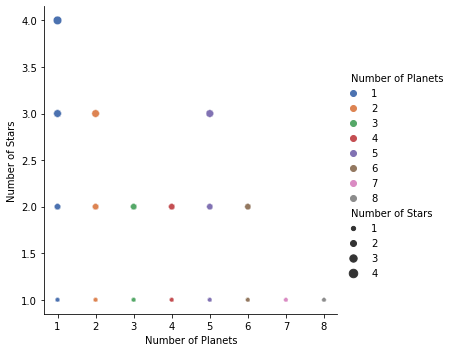

In [59]:
sns.relplot(data=newPlanetList, x="Number of Planets", y="Number of Stars", hue="Number of Planets", size="Number of Stars", palette="deep")

Panda table displaying number of planet in a 1,2,3, or 4 star system.

In [60]:
graphStar = newPlanetList.groupby('Number of Stars')[['Number of Planets']].count()
graphStar


,Number of Planets
Number of Stars,
1,3560
2,236
3,26
4,1


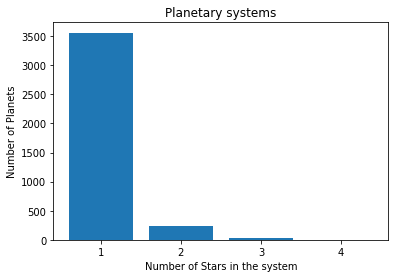

In [61]:
length = [1,2,3,4]
data = graphStar['Number of Planets']
plt.xticks(range(len(data)), length)
plt.xlabel('Number of Stars in the system')
plt.ylabel('Number of Planets')
plt.title('Planetary systems')
plt.bar(range(len(data)), data) 
plt.show()

Panda tables displaying the number of star systems with 1,2,3,4,5,6,7, or 8 planets.

In [62]:

graphStar2 = newPlanetList.groupby('Number of Planets')[['Number of Stars']].count()
graphStar2

,Number of Stars
Number of Planets,
1,2207
2,800
3,434
4,216
5,109
6,34
7,7
8,16


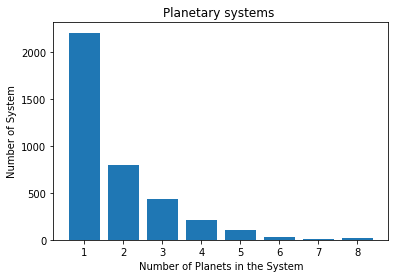

In [63]:
length2 = [1,2,3,4,5,6,7,8]
data2 = graphStar2['Number of Stars']
plt.xticks(range(len(data2)), length2)
plt.xlabel('Number of Planets in the System')
plt.ylabel('Number of System')
plt.title('Planetary systems ')
plt.bar(range(len(data2)), data2) 
plt.show()